In [1]:
import numpy as np 
import pandas as pd 

df = pd.read_csv('C://Users//hasan//OneDrive//Desktop//DS//seri4//emtiazy//A_Z Handwritten Data.csv')


In [2]:
X = df.drop('0', axis=1)
y = df['0']
X = X / 255.0
X = np.array(X)
y = np.array(y)


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Dimensionality Reduction (PCA)
pca = PCA(n_components=0.95)  # Adjust the explained variance threshold
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create a Random Forest instance
rf_model = RandomForestClassifier(random_state=42)

# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
rf_preds = rf_model.predict(X_test)

# Calculate accuracy
rf_accuracy = accuracy_score(rf_preds, y_test)
print('Random Forest Accuracy:', rf_accuracy * 100, '%')


Random Forest Accuracy: 98.3702510404081 %


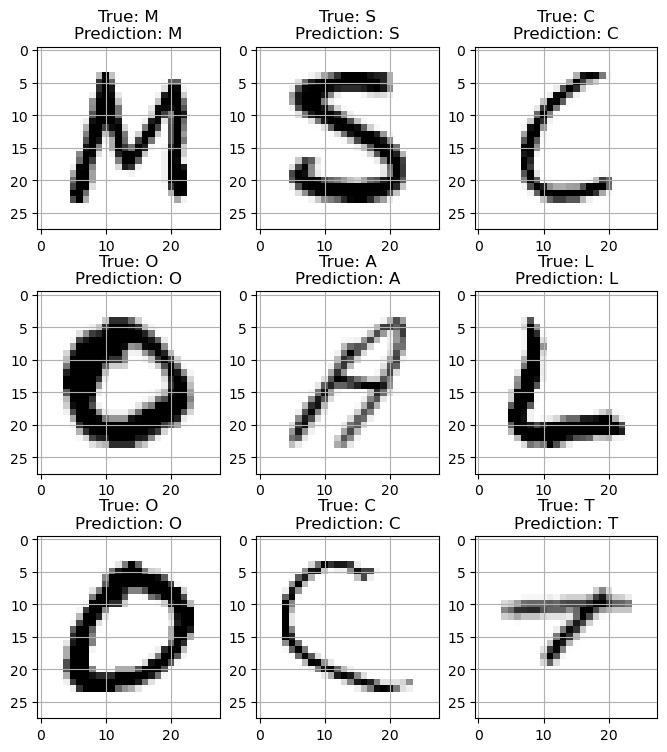

In [8]:
import matplotlib.pyplot as plt

# Assuming 'rf_model' is your Random Forest model and 'word_dict' contains label mappings
word_dict = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z'}

# Assuming X_test and y_test are available
fig, axes = plt.subplots(3, 3, figsize=(8, 9))
axes = axes.flatten()

for i, ax in enumerate(axes):
    img = np.reshape(X_test[i], (28, 28))
    ax.imshow(img, cmap="Greys")
    
    # Make predictions using the Random Forest model
    pred_label = rf_model.predict([X_test[i]])[0]
    pred = word_dict[pred_label]
    
    true_label = word_dict[y_test[i]]
    
    ax.set_title(f"True: {true_label}\nPrediction: {pred}")
    ax.grid()

plt.show()


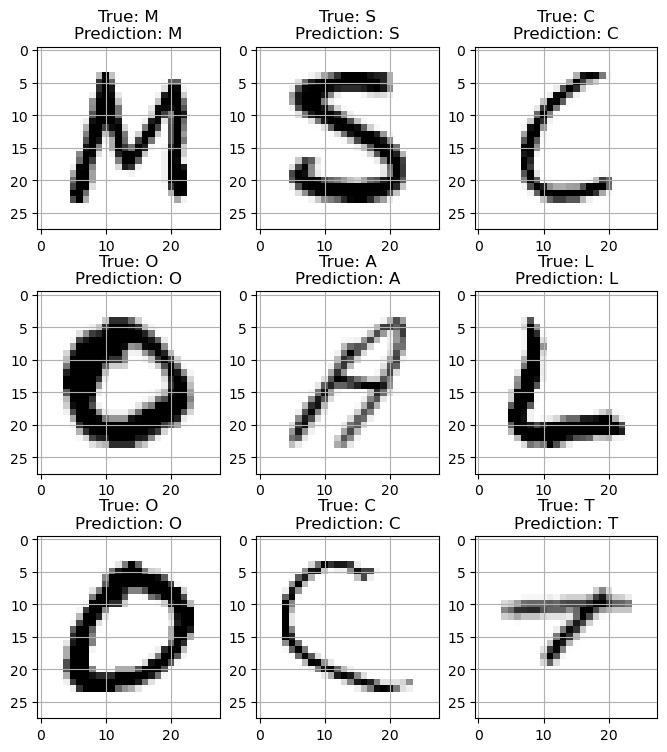

In [9]:
import matplotlib.pyplot as plt

# Assuming 'rf_model' is your Random Forest model and 'word_dict' contains label mappings
word_dict = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z'}

# Assuming X_test and y_test are available
fig, axes = plt.subplots(3, 3, figsize=(8, 9))
axes = axes.flatten()

for i, ax in enumerate(axes):
    img = np.reshape(X_test[i], (28, 28))
    ax.imshow(img, cmap="Greys")
    
    # Reshape for passing into the model
    img_for_prediction = X_test[i].reshape(1, -1)
    
    # Make predictions using the Random Forest model
    pred_label = rf_model.predict(img_for_prediction)[0]
    pred = word_dict[pred_label]
    
    true_label = word_dict[y_test[i]]
    
    ax.set_title(f"True: {true_label}\nPrediction: {pred}")
    ax.grid()

plt.show()
